# <font color='blue'> Exploratory Data Analysis with Python</font>

### Lise Doucette, Data and Statistics Librarian
### Nich Worby, Government Information and Statistics Librarian
### mdl@library.utoronto.ca

# <font color='blue'> Outline </font>



## <font color='blue'> 1 Overview</blue>

## <font color='blue'> 2 Import libraries and import your data </font>

## <font color='blue'> 3 Viewing your Data </font>

## <font color='blue'> 4 Selecting and filtering your data </font>

## <font color='blue'> 5 Create crosstabs and grouping data </font>

## <font color='blue'> 6 Editing data / creating new fields </font>

## <font color='blue'> 7 Getting help </font>

---

## <font color='blue'> 2. Import packages/libraries and import your data</font>


### a) Import packages/libraries

Things to consider:
- functionality that you need 
- depending on setup of Python on your computer, you may need to install the libraries first using [Anaconda Navigator](https://docs.anaconda.com/anaconda/navigator/tutorials/manage-packages/), [conda](https://docs.anaconda.com/anaconda/user-guide/tasks/install-packages/), or the [command line](https://packaging.python.org/tutorials/installing-packages/)
- using a nickname/short name for libraries that you will be referring to later (there are some common/standard ones)
- syntax for importing packages/libraries: __import packagename as nickname__ 

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### b) Import existing data

Things to consider:
- where the data is stored
    - same folder as your Jupyter notebook or Python file?  don't need to specify the path
    - different folder?  need to specify path
- file type of data (csv, excel, text, other) and whether you might need a package to help you read the data
- how the data is separated (comma, space, semicolon, other)
- is there a header row with variable names?
- pandas makes some guesses about your data format and type
    - int64, float64, object, bool
- in pandas, your data is stored in a data frame

[Importing Data cheatsheat](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Cheat+Sheets/Importing_Data_Python_Cheat_Sheet.pdf)

In [35]:
titanic = pd.read_csv('titanic.csv', sep = ';')

## <font color='blue'>3. Viewing your Data</font>


### a)  View the first few rows of data

Things to note:
- first row is Row 0
- you can indicate how many rows you want to see by including a number in parentheses (default is 5)

In [36]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### b) Variable/column names and types

Things to consider:
- did pandas guess correctly about the type of data? What can you do if it didn't?
    - use __.astype()__
    - code: __titanic['ColumnName'] = titanic['ColumnName'].astype('NewDataType')__
- you can also see just a list of column names with the code: __titanic.columns__

In [37]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


### c) Missing/null data

Things to consider:
- why is the data "missing"?
- how will missing data affect your analyses? What can you do to address this?
    - need to know when pandas includes/excludes null values

In [38]:
titanic.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

### d) View a summary of your variables

Things to consider:
- what kinds of summary measures are meaningful for different variable types?
- how is the mean value of age calculated?

In [39]:
titanic.describe()
titanic.describe(include = 'all')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,27,NaN,369
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


### e) View more meaningful summary data for categorical data

In [40]:
titanic['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64

### f) Create a bar plot for categorical data

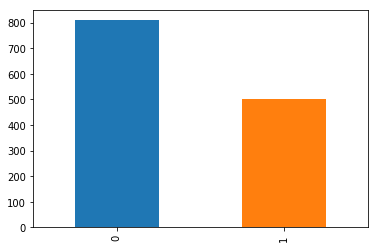

In [41]:
titanic['survived'].value_counts().plot(kind = 'bar')

### g) Create a histogram for continuous, numerical data

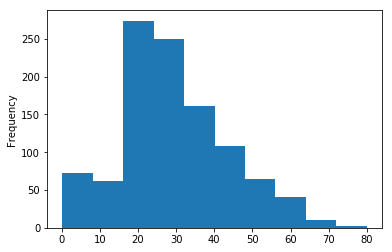

In [42]:
# what age range
# can define how tall or w
titanic['age'].plot(kind = 'hist')

## Exercise

1. What was the most common age of passengers on the Titanic? Hint: use value_counts()
2. Create a bar plot of passenger class

In [43]:
titanic['age'].value_counts()

24.0000    47
22.0000    43
21.0000    41
30.0000    40
18.0000    39
25.0000    34
28.0000    32
36.0000    31
27.0000    30
29.0000    30
26.0000    30
19.0000    29
23.0000    26
32.0000    24
20.0000    23
35.0000    23
31.0000    23
45.0000    21
33.0000    21
17.0000    20
39.0000    20
16.0000    19
40.0000    18
42.0000    18
34.0000    16
50.0000    15
47.0000    14
48.0000    14
38.0000    14
2.0000     12
           ..
28.5000     3
18.5000     3
12.0000     3
71.0000     2
45.5000     2
36.5000     2
34.5000     2
14.5000     2
0.9167      2
30.5000     2
70.0000     2
55.5000     1
20.5000     1
0.4167      1
60.5000     1
23.5000     1
22.5000     1
38.5000     1
66.0000     1
24.5000     1
74.0000     1
0.1667      1
0.3333      1
80.0000     1
11.5000     1
26.5000     1
67.0000     1
70.5000     1
76.0000     1
0.6667      1
Name: age, Length: 98, dtype: int64

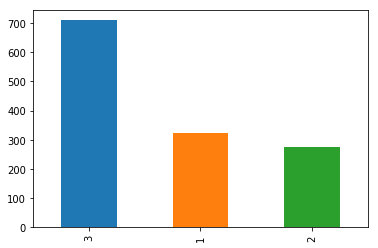

In [44]:
titanic['pclass'].value_counts().plot(kind = 'bar')

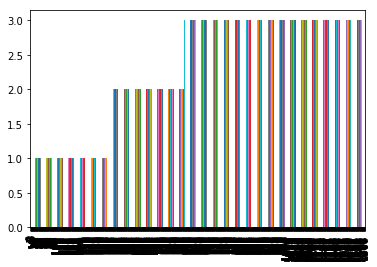

In [31]:
titanic['pclass'].plot(kind = 'bar')

## <font color='blue'>4. Selecting and filtering your data / INDEX</font>

Things to note:
- syntax differences when selecting [one] vs [[multiple]] columns

In [48]:
# titanic [['col_01', 'col2']]
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

### a) Select/view one column

In [49]:
titanic['name']

0                           Allen, Miss. Elisabeth Walton
1                          Allison, Master. Hudson Trevor
2                            Allison, Miss. Helen Loraine
3                    Allison, Mr. Hudson Joshua Creighton
4         Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
5                                     Anderson, Mr. Harry
6                       Andrews, Miss. Kornelia Theodosia
7                                  Andrews, Mr. Thomas Jr
8           Appleton, Mrs. Edward Dale (Charlotte Lamson)
9                                 Artagaveytia, Mr. Ramon
10                                 Astor, Col. John Jacob
11      Astor, Mrs. John Jacob (Madeleine Talmadge Force)
12                          Aubart, Mme. Leontine Pauline
13                           Barber, Miss. Ellen "Nellie"
14                   Barkworth, Mr. Algernon Henry Wilson
15                                    Baumann, Mr. John D
16                               Baxter, Mr. Quigg Edmond
17        Baxt

### b) Select/view multiple columns

In [51]:
titanic[['name', 'fare']]

,name,fare
0,"Allen, Miss. Elisabeth Walton",211.3375
1,"Allison, Master. Hudson Trevor",151.5500
2,"Allison, Miss. Helen Loraine",151.5500
3,"Allison, Mr. Hudson Joshua Creighton",151.5500
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",151.5500
5,"Anderson, Mr. Harry",26.5500
6,"Andrews, Miss. Kornelia Theodosia",77.9583
7,"Andrews, Mr. Thomas Jr",0.0000
8,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",51.4792
9,"Artagaveytia, Mr. Ramon",49.5042


### c) Select/view specific rows and columns

Note: this will return values at the specific rows and columns that you specify (so rows 0:10 will show 11 rows, from Row 0 to Row 10)

In [53]:
# index 0 = position 1
# for location(loc)
# help

# titanic.loc[row(0), [col(10)]]
titanic.loc[0:10, ['name', 'fare']]

,name,fare
0,"Allen, Miss. Elisabeth Walton",211.3375
1,"Allison, Master. Hudson Trevor",151.5500
2,"Allison, Miss. Helen Loraine",151.5500
3,"Allison, Mr. Hudson Joshua Creighton",151.5500
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",151.5500
5,"Anderson, Mr. Harry",26.5500
6,"Andrews, Miss. Kornelia Theodosia",77.9583
7,"Andrews, Mr. Thomas Jr",0.0000
8,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",51.4792
9,"Artagaveytia, Mr. Ramon",49.5042


### d) Select/view rows and columns by range of indices

Note: this will return values at the ranges of rows and columns that you specify.  In Python, this means from the lower index to one less than the higher index (so rows 0:10 will show 10 rows, from Row 0 to Row 9, and columns 0:3 will show 3 columns, from Column 0 to Column 2)

In [54]:
# index location = iloc
# find a value of something specific
# help

# titanic.iloc[row(0:0), col(0:0)] think of excel's position
titanic.iloc[0:10, 0:3]

,pclass,survived,name
0,1,1,"Allen, Miss. Elisabeth Walton"
1,1,1,"Allison, Master. Hudson Trevor"
2,1,0,"Allison, Miss. Helen Loraine"
3,1,0,"Allison, Mr. Hudson Joshua Creighton"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)"
5,1,1,"Anderson, Mr. Harry"
6,1,1,"Andrews, Miss. Kornelia Theodosia"
7,1,0,"Andrews, Mr. Thomas Jr"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)"
9,1,0,"Artagaveytia, Mr. Ramon"


## Exercise

1. Show the final 10 rows of the data set, and the  name and home destination columns.

In [71]:
titanic.iloc[-10:-1, 2:15]
# help for loc and iloc


,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1299,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,C,NaN,NaN
1300,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN
1301,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C,NaN,312.0,NaN
1302,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN
1304,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [ ]:
# tail

titanic.iloc[['home', '']]

In [ ]:
# pandas.DataFrame.last
# https://is.gd/Y8rejm

titanic

### e) Select/view data that meets certain conditions (filters)

In [72]:
#

titanic[titanic['fare'] > 50]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
10,1,0,"Astor, Col. John Jacob",male,47.0000,1,0,PC 17757,227.5250,C62 C64,C,NaN,124.0,"New York, NY"
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0000,1,0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY"
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0000,0,0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France"


In [73]:
# compare var01 to var 2 == numbered value
titanic[titanic['survived'] == 1]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0000,1,0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY"
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0000,0,0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France"
13,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0000,0,0,19877,78.8500,NaN,S,6,NaN,NaN
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0000,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks"
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0000,0,1,PC 17558,247.5208,B58 B60,C,6,NaN,"Montreal, PQ"


In [74]:
# can specify regex for after 'Robert'
# leng = number of x that meet the condition

titanic[titanic['name'].str.contains('Robert')]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
43,1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C,8,NaN,"Philadelphia, PA"
70,1,0,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0000,NaN,S,NaN,NaN,"Liverpool, England / Belfast"
79,1,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55.0,2,0,11770,25.7000,C101,S,2,NaN,"New York, NY"
87,1,1,"Daniel, Mr. Robert Williams",male,27.0,0,0,113804,30.5000,NaN,S,3,NaN,"Philadelphia, PA"
195,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S,8,NaN,NaN
202,1,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S,7,NaN,"Philadelphia, PA"
238,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S,2,NaN,"St Louis, MO"
273,1,1,"Spedden, Master. Robert Douglas",male,6.0,0,2,16966,134.5000,E34,C,3,NaN,"Tuxedo Park, NY"
332,2,0,"Baimbrigge, Mr. Charles Robert",male,23.0,0,0,C.A. 31030,10.5000,NaN,S,NaN,NaN,Guernsey
335,2,0,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S,NaN,174.0,"Jacksonville, FL"


In [75]:
titanic[titanic['name'] == "Chisholm, Mr. Roderick Robert Crispin"]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
70,1,0,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,NaN,S,NaN,NaN,"Liverpool, England / Belfast"


### f) Number of rows that meet your conditions


In [79]:
# ppl of Robert who paid more than 50$ using AND OR



len(titanic[titanic['fare'] > 50])

240

### g) Combine multiple filters

Note: Combine with & (this means AND) or | (this means OR)

In [80]:
# titanic()

titanic[(titanic['fare'] > 50) & titanic['name'].str.contains("Robert")]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
43,1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C,8,NaN,"Philadelphia, PA"
195,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S,8,NaN,NaN
238,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S,2,NaN,"St Louis, MO"
273,1,1,"Spedden, Master. Robert Douglas",male,6.0,0,2,16966,134.5000,E34,C,3,NaN,"Tuxedo Park, NY"


## Exercise

1. Create a filter that lists passengers who did not survive
2. Combine the filters we created earlier to create a list of passengers with the name Robert who survived
3. Create a filter that lists passengers in class 1 who were more than 30 years old
4. How many passengers fit the criteria from question 3?


In [84]:
# len = filter
len(titanic(titanic['survived'])) & titanic['name']

TypeError: 'DataFrame' object is not callable

## <font color='blue'>5 Creating crosstabs and grouping data</font>

### a) Create crosstabs

Things to think about:
- data types of variables you're interested in

In [86]:
# pd = []
# crosstab (compare 2+ variables), think of scatter plot
# help def
pd.crosstab(titanic.pclass, titanic.survived)

survived,0,1
pclass,,
1,123,200
2,158,119
3,528,181


Use the normalize argument to display crosstab values as percentages

In [88]:
# high to low of survival class
# class, sex, survival rates, use []

pd.crosstab(titanic.pclass, titanic.survived, normalize = 'index')

survived,0,1
pclass,,
1,0.380805,0.619195
2,0.570397,0.429603
3,0.744711,0.255289


Cross tabs aren't just limited to comparing two variables at a time. Let's say we want to compare passenger class, sex and survival rates. We can use square brackets [ ] to incorporate more variables into the crosstab, similar to earlier exammples.

In [89]:
# help def normalize

pd.crosstab([titanic.pclass, titanic.sex], titanic.survived, normalize = 'index')

survived              0         1
pclass sex                       
1      female  0.034722  0.965278
       male    0.659218  0.340782
2      female  0.113208  0.886792
       male    0.853801  0.146199
3      female  0.509259  0.490741
       male    0.847870  0.152130

### b) Grouping Data 

- when does it make sense to use sum, mean, value_counts?

In [93]:
# pd.groupby('object').mean().sum()
# watch out for parents and child values, but you can use mean()

titanic.groupby('pclass').sum()

AttributeError: 'function' object has no attribute 'last'

In [91]:
titanic.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [96]:
# pd.groupby('objectA')['objectB'].method()

titanic.groupby('pclass')['survived'].sum()

pclass
1    200
2    119
3    181
Name: survived, dtype: int64

In [97]:
titanic.groupby('pclass')['survived'].value_counts()
# help 
# this is only a groupby('A')['B']
# (1st var)[2nd var]
# survived

pclass  survived
1       1           200
        0           123
2       0           158
        1           119
3       0           528
        1           181
Name: survived, dtype: int64

### Exercise

1. Create a crosstab to show the numbers of men and women who survived.
2. Create a table to show the same data using groupby.

Which output is easier to read?

In [98]:
# this is easier to read for smaller data

pd.crosstab(titanic.sex, titanic.survived)

survived,0,1
sex,,
female,127,339
male,682,161


In [100]:
# easier to read when 3+ more variable

titanic.groupby('sex')['survived'].value_counts()

sex     survived
female  1           339
        0           127
male    0           682
        1           161
Name: survived, dtype: int64

## <font color='blue'>6 Editing data and creating new fields</font>

Often variables in datasets use codes that aren't very descriptive. It's helpful to first view all codes in a variable before editing.

In [103]:
# if time wasting, there are other ways to do this
# embarked = variable
titanic['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

Next, read the codebook to understand what the codes mean. There are 3 codes for embarkation points: S = Southampton, C = Cherbourg and Q = Queenstown. Start the next line with the name of the variable you would like to edit, e.g. titanic['embarked']. 

Use the = sign next to make sure you write the change to the entire variable and save it. This is similar to value assignment in algebra, e.g. x = y + z. 

We can use the .replace( ) method to change our codes to names. We can use .value_counts( ) to check our work.

In [104]:
# save as a variable
titanic['embarked'] = titanic['embarked'].replace(['S', "C", "Q"], ["Southampton", "Cherbourg", "Queenstown"])

# find X in [] and .replace as Y inside [] = find and replace


In [105]:
# check if it works

titanic['embarked'].value_counts()

Southampton    914
Cherbourg      270
Queenstown     123
Name: embarked, dtype: int64

### Creating new variables

The syntax for creating new variables in a dataframe starts by calling the dataframe by name and placing the variable name is square brackets in quotes and assigning value with an equal sign. e.g. dataframe['new variable'] = value.

Let's say we want to calculate the fare variable in Canadian dollars. In 1912, the value of the Canadian dollar was pegged at 4.8666CAD to one British Pound Sterling.

In [115]:
# rather than call variable on left, just call on right
# help
titanic['fare_CAhrynrnrD'] = titanic['fare']*4.8666
print('fare_CAD')


In [114]:
print(titanic['fare_CAD'])
# titanic.head()



0       1028.495077
1        737.533230
2        737.533230
3        737.533230
4        737.533230
5        129.208230
6        379.391863
7          0.000000
8        250.528675
9        240.917140
10      1107.273165
11      1107.273165
12       337.255380
13       383.731410
14       145.998000
15       126.166605
16      1204.584725
17      1204.584725
18       371.281187
19       366.171257
20       255.760270
21       255.760270
22       145.998000
23      1107.273165
24      1079.310655
25       126.531600
26       443.246035
27       443.246035
28       660.073018
29       129.208230
           ...     
1279      38.223250
1280      38.425700
1281      43.799400
1282      39.176130
1283      36.742830
1284      39.176130
1285      46.232700
1286      35.181625
1287      37.716150
1288      31.612460
1289      31.612460
1290      34.066200
1291      42.400253
1292      36.742830
1293      39.176130
1294      78.352260
1295      35.282850
1296      42.156923
1297      35.282850


In [ ]:
# .to_csv() = to export, add new field
titanic.to_csv('new_name.csv')

# use case = good to share only specific data others only want

Check if the new variable has been added by using the .head( ) method.

## Exercise

Create a new variable called 'is_child'. Filter the data for all passengers under the age of 18 and assign the results to the new variable. Check your new variable using .value_counts(). Next, do a crosstab to check survival rates for children vs. adults. **Bonus:** Add pclass to the crosstab to see how many children and adults in first, second, and third class survived or perished.

In [112]:
titanic['is_child'] = titanic['age'] <= 18

In [113]:
titanic['is_child'].value_counts()

False    1116
True      193
Name: is_child, dtype: int64